# MNIST Dataset Classification
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.[1][2] The database is also widely used for training and testing in the field of machine learning.[3][4] It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments.[5] Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.[5]<br>
https://en.wikipedia.org/wiki/MNIST_database

## Introduction to CNN
Using keras library (tensorflow)<br>
The original tutorial and the dataset can be found <a href="https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6">here</a>


## --- List of Contents ---

#### 1 Data Preprocessing
&emsp;[1.1 Load data](#1.1)<br>
&emsp;[1.2 Set Input and Output](#1.2)<br>
&emsp;[1.3 Check NaN Value in the Data](#1.3)<br>
&emsp;[1.4 Normalization](#1.4)<br>
&emsp;[1.5 Reshape](#1.5)<br>
&emsp;[1.6 Label Encoding](#1.6)<br>
&emsp;[1.7 Split Training and Test/Validation Set](#1.7)<br>
#### 2 CNN
&emsp;[2.1 Define Model](#2.1)<br>
&emsp;[2.2 Train Model](#2.2)<br>
&emsp;[2.3 Data Augmentation](#2.3)<br>
&emsp;[2.4 Algorithm's Performance](#2.4)<br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')
np.random.seed(7)

Using TensorFlow backend.


## 1 Data Preprocessing
<a id='1.1'></a>
### 1.1 Load Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id='1.2'></a>
### 1.2 Set Input and Output
- columns named "pixel..." as <u><b>input</u></b>, so we need to drop the label column
- column named "label" as <u><b>output</u></b>

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

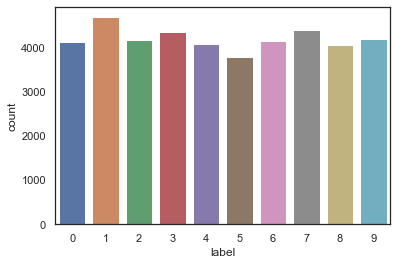

In [3]:
X_train = train.drop(labels = ["label"],axis = 1)
y_train = train["label"]

g = sns.countplot(y_train)
y_train.value_counts()

<a id='1.3'></a>
### 1.3 Check NaN Value in the Data

In [4]:
print(' ---Train data---','\n',X_train.isnull().any().describe(),'\n','\n','---Test data---','\n',test.isnull().any().describe())

 ---Train data--- 
 count       784
unique        1
top       False
freq        784
dtype: object 
 
 ---Test data--- 
 count       784
unique        1
top       False
freq        784
dtype: object


<a id='1.4'></a>
### 1.4 Normalization
Perform grayscale normalization to reduce the effect of illumination's differences and speed up the training process

In [5]:
X_train = X_train / 255.0
test = test / 255.0

<a id='1.5'></a>
### 1.5 Reshape
Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1). CNN Modell from keras requires an extra dimension in the end which correspond to channels. Because we have already normalized to grayscale, so it use only 1 canal (RGB use 3 canal).

In [6]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

<a id='1.6'></a>
### 1.6 Label Encoding
Label encoding using scikit-learn library to one-hot-encoding.<br>
For example, if we have 3 labels:<br>
- label 1 = [1,0,0]
- label 2 = [0,1,0]
- label 3 = [0,0,1]

In [7]:
y_train = to_categorical(y_train, num_classes = 10)

<a id='1.7'></a>
### 1.7 Split Training and Test/Validation Set

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=7)

## 2 CNN
<a id='2.1'></a>
### 2.1 Define Model

In [9]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [11]:
model.compile(optimizer = 'rmsprop', loss = "categorical_crossentropy", metrics=["accuracy"])

<a id='2.2'></a>
### 2.2 Train Model

In [12]:
history = model.fit(X_train, y_train, batch_size = 86, epochs = 1, 
                    validation_data = (X_val, y_val), verbose = 2)

Instructions for updating:
Use tf.cast instead.
Train on 37800 samples, validate on 4200 samples
Epoch 1/1
 - 196s - loss: 0.2354 - acc: 0.9269 - val_loss: 0.0638 - val_acc: 0.9807


<a id='2.3'></a>
### 2.3 Data Augmentation
With the library from keras ImageDataGenerator we can expand our dataset through image manipulation, such as: randomly rotate images, zoom images, shift images, etc.

In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [14]:
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=86),
                              epochs = 1, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // 86)

Epoch 1/1
 - 189s - loss: 0.1770 - acc: 0.9474 - val_loss: 0.0464 - val_acc: 0.9869


<a id='2.4'></a>
### 2.4 Alogrithm's Performance
Visualize the performance using confusion matrix

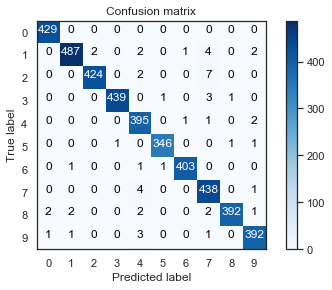

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))